In [82]:
# import packages

# import clevercsv as csv
import re
from datetime import datetime
import time
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import pandas_profiling as pdp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import csv
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from io import StringIO
%matplotlib inline

In [83]:
plt.style.use('dark_background')
pio.templates.default = "plotly_dark"

In [84]:
for_pd = StringIO()
with open('accre-jobs-2020.csv') as accre:
    for line in accre:
        new_line = re.sub(r',', '|', line.rstrip(), count=12)
        print (new_line, file=for_pd)

for_pd.seek(0)

accre = pd.read_csv(for_pd, sep='|')#[1000000:1005000] # add this to subset
print (accre.head())

      JOBID  ACCOUNT      USER    REQMEM    USEDMEM      REQTIME     USEDTIME  \
0  15925210  treviso  arabella  122880Mn  65973.49M  13-18:00:00  13-18:00:28   
1  15861126  treviso  arabella  122880Mn  67181.12M  13-18:00:00  12-14:50:56   
2  15861125  treviso  arabella  122880Mn  69111.86M  13-18:00:00  13-18:00:20   
3  16251645  treviso  arabella  122880Mn  65317.33M  13-18:00:00  12-03:50:32   
4  16251646  treviso  arabella  122880Mn  65876.11M  13-18:00:00  13-18:00:03   

   NODES  CPUS   PARTITION EXITCODE      STATE NODELIST  
0      1    24  production      0:0  COMPLETED   cn1531  
1      1    24  production      0:0  COMPLETED   cn1441  
2      1    24  production      0:0  COMPLETED   cn1464  
3      1    24  production      0:0  COMPLETED   cn1473  
4      1    24  production      0:0  COMPLETED   cn1440  


In [85]:
accre_df.shape

(3816290, 18)

In [86]:
accre.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440


In [87]:
accre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816290 entries, 0 to 3816289
Data columns (total 13 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   JOBID      object
 1   ACCOUNT    object
 2   USER       object
 3   REQMEM     object
 4   USEDMEM    object
 5   REQTIME    object
 6   USEDTIME   object
 7   NODES      int64 
 8   CPUS       int64 
 9   PARTITION  object
 10  EXITCODE   object
 11  STATE      object
 12  NODELIST   object
dtypes: int64(2), object(11)
memory usage: 378.5+ MB


In [88]:
#only 0:0
accre = accre[accre['EXITCODE'] == '0:0']

In [89]:
accre = accre[accre['PARTITION'] == 'production']

In [90]:
accre.head()

,JOBID,ACCOUNT,USER,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,NODELIST
0,15925210,treviso,arabella,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,cn1531
1,15861126,treviso,arabella,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,cn1441
2,15861125,treviso,arabella,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,cn1464
3,16251645,treviso,arabella,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,cn1473
4,16251646,treviso,arabella,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,cn1440


In [91]:
# remove columns
accre = accre.drop(["JOBID","USER", "NODELIST"], axis =1) # axis = 1 so that it works across our columns
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED


In [93]:
#new column is for requested memory per node
accre['RMPN'] = accre['REQMEM'].str.extract('(.*)Mn$')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880


In [94]:
#new column is for requested memory per core
accre['RMPC'] = accre['REQMEM'].str.extract('(.*)Mc$')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880,NaN
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880,NaN
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880,NaN
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880,NaN
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880,NaN


In [59]:
accre['RMPC'].fillna('0').head()

0    0
1    0
2    0
3    0
4    0
Name: RMPC, dtype: object

In [60]:
accre['RMPN'].fillna('0').head()

0    122880
1    122880
2    122880
3    122880
4    122880
Name: RMPN, dtype: object

In [95]:
# change RMPC colum to fill with na with 0
accre['RMPC'] = accre['RMPC'].fillna('0')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880,0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880,0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880,0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880,0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880,0


In [96]:
# Change RMPN column to fill na with 0
accre['RMPN'] = accre['RMPN'].fillna('0')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880,0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880,0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880,0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880,0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880,0


In [97]:
accre['RMPC']= accre['RMPC'].astype(str).astype(float)

In [98]:
accre['RMPN']= accre['RMPN'].astype(str).astype(float)

In [1]:
accre.head()

NameError: name 'accre' is not defined

In [99]:
# clean the USEDMEM column
#new column is for requested memory per core
accre['UM'] = accre['USEDMEM'].str.extract('(.*)M$')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880.0,0.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880.0,0.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880.0,0.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880.0,0.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880.0,0.0,65876.11


In [100]:
accre.isnull().sum()

ACCOUNT           0
REQMEM            0
USEDMEM           0
REQTIME           0
USEDTIME          0
NODES             0
CPUS              0
PARTITION         0
EXITCODE          0
STATE             0
RMPN              0
RMPC              0
UM           545099
dtype: int64

In [101]:
accre['UM'] = accre['UM'].fillna('0')

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,122880.0,0.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,122880.0,0.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,122880.0,0.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,122880.0,0.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,122880.0,0.0,65876.11


In [102]:
accre['UM']= accre['UM'].astype(str).astype(float)

In [103]:
accre['UM'].describe()

count    3.310591e+06
mean     3.190218e+03
std      6.848975e+03
min      0.000000e+00
25%      2.136000e+01
50%      6.312800e+02
75%      3.553930e+03
max      2.473988e+05
Name: UM, dtype: float64

In [24]:
# test_state = clean_accre_df[(clean_accre_df["STATE"] == 'COMPLETED')]

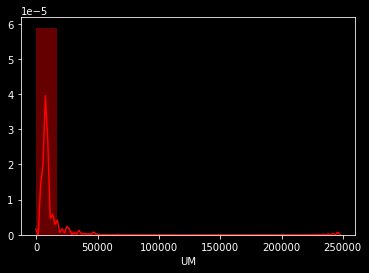

In [104]:
sns.distplot(accre.UM, bins=15, kde=True, color="red");

In [106]:
# what is per core??? assume you multiply cpus by node this column will be RMPN times CPUS 
#3.5 is the average node to core ratio
accre['RMPN'] = (accre['RMPN'] /accre['CPUS'])/ accre['NODES']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,0.0,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,0.0,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,0.0,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,0.0,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,0.0,65876.11


In [107]:
# what is per core??? update RMPC to add the RMPNEW column
accre['RMPC'] = accre['RMPC'] + accre['RMPN']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,65973.49
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,67181.12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,69111.86
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,65317.33
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,65876.11


In [108]:
#convert used memory to cores 
accre['UM'] = (accre['UM'] /accre['CPUS'])/ accre['NODES']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917


In [109]:
# PERCENT of request to actual used
accre['PRU'] = ((accre['UM'] - accre['RMPC'])/accre['RMPC']) * 100
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773


In [112]:
accre.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
delblush     939.324900
arra         830.714632
sunflower    585.135815
jicama       453.780890
chasselas    275.888786
                ...    
with        -100.000000
flamingo    -100.000000
discovery   -100.000000
wa          -100.000000
hass        -100.000000
Name: PRU, Length: 139, dtype: float64

In [113]:
accre_df_best = accre[(accre["PRU"] == 0)]
accre_df_best.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
wood           0.0
galia          0.0
bulk           0.0
bunch          0.0
cantared       0.0
carrot         0.0
casaba         0.0
cep            0.0
chickpeas      0.0
cms            0.0
cms_lowprio    0.0
fresh          0.0
horseradish    0.0
winged         0.0
lollo          0.0
mignonette     0.0
mixed          0.0
pepino         0.0
retailer       0.0
shallots       0.0
sharlin        0.0
summer         0.0
sunflower      0.0
texas          0.0
belle          0.0
Name: PRU, dtype: float64

In [114]:
accre_df_toolittle = accre[(accre["PRU"] > 800)]
accre_df_toolittle.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
arra            4495.549448
belle           2034.999263
yu              2009.500000
delblush        1952.190973
large           1499.898438
cep             1498.070000
alkmene         1453.309342
almonds         1396.727783
treviso         1394.630005
pepino          1368.226827
blackberries    1271.345660
atemoyas        1221.546250
lemon           1187.436768
horseradish     1146.737942
burro           1135.335837
muscat          1131.501811
tips            1120.591016
horn            1110.299944
cantared        1108.710774
sharlin         1105.675886
fresh           1099.993683
baking          1097.586411
conference      1094.825403
bulk            1092.314158
portabella      1079.729036
texas           1077.107217
retailer        1067.023162
galia           1060.871689
chasselas       1025.113263
jicama          1014.830222
bay              999.999902
winged           990.904590
anise            959.441592
grisette         955.872375
st               928.680078
rocha       

In [115]:
accre_df_over = accre[(accre["PRU"] < -99)]
accre_df_over.groupby('ACCOUNT')['PRU'].mean().sort_values(ascending=False)

ACCOUNT
broccoli     -99.331546
pasilla      -99.362457
spring       -99.579735
amaranth     -99.588365
large        -99.648057
                ...    
florence    -100.000000
flamingo    -100.000000
discovery   -100.000000
cactus      -100.000000
peanuts     -100.000000
Name: PRU, Length: 129, dtype: float64

# Question 3
What groups are best optimizing their memory usage in terms of percent of actual memory used of the memory requested for a job? What is the average percent for each group?

# Question 4

# Answer 1:
x is the best group for using 

# Answer 2:
The average percent for each group is

In [116]:
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773


In [94]:
# REPLACE - WITH :
#clean_accre_df['REQTIME'] = clean_accre_df['REQTIME'].replace('-',':',regex=True)
#clean_accre_df['USEDTIME'] = clean_accre_df['USEDTIME'].replace('-',':',regex=True)

In [121]:
# gather the days and nothing else
#(\d{2})[\.-]
accre['RD'] = accre['USEDTIME'].str.extract('(\d{2})[\.-]')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,13
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,12
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,13
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,12
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,13


In [122]:
accre.isnull().sum()

ACCOUNT            0
REQMEM             0
USEDMEM            0
REQTIME            0
USEDTIME           0
NODES              0
CPUS               0
PARTITION          0
EXITCODE           0
STATE              0
RMPN              14
RMPC              14
UM                 0
PRU               14
RD           3309921
dtype: int64

In [123]:
accre['RD'] = accre['RD'].fillna('0')

In [125]:
# gather minutes
# [\.:](\d{2})[\.:]
accre['RM'] = accre['USEDTIME'].str.extract('[\.:](\d{2})[\.:]')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD,RM
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,13,00
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,12,50
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,13,00
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,12,50
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,13,00


In [126]:
# gather hours hh mm ss
#^(\d{2})[\.:]
accre['RH1'] = accre['USEDTIME'].str.extract('^(\d{2})[\.:]')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD,RM,RH1
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,13,00,NaN
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,12,50,NaN
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,13,00,NaN
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,12,50,NaN
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,13,00,NaN


In [127]:
# gather hours for days hh mm ss
#[\.-](\d{2})[\.:]
accre['RH2'] = accre['USEDTIME'].str.extract('[\.-](\d{2})[\.:]')
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD,RM,RH1,RH2
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,13,00,NaN,18
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,12,50,NaN,14
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,13,00,NaN,18
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,12,50,NaN,03
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,13,00,NaN,18


In [140]:
accre['RS'] = accre['REQTIME'].str[-2:]
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,...,RMPC,UM,PRU,RD,RM,RH1,RH2,RH,RT,RS
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,...,213.333333,2748.895417,1188.544727,1123200.0,0.0,0.0,18.0,64800.0,1188000.0,00
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,...,213.333333,2799.213333,1212.131250,1036800.0,3000.0,0.0,14.0,50400.0,1090200.0,00
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,...,213.333333,2879.660833,1249.841016,1123200.0,0.0,0.0,18.0,64800.0,1188000.0,00
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,...,213.333333,2721.555417,1175.729102,1036800.0,3000.0,0.0,3.0,10800.0,1050600.0,00
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,...,213.333333,2744.837917,1186.642773,1123200.0,0.0,0.0,18.0,64800.0,1188000.0,00


In [ ]:
# FILL NA

In [128]:
accre['RM'] = accre['RM'].fillna('0')

In [129]:
accre['RH1'] = accre['RH1'].fillna('0')

In [130]:
accre['RH2'] = accre['RH2'].fillna('0')

In [142]:
accre['RS'] = accre['RS'].fillna('0')

In [ ]:
# CONVERT TO INTEGER

In [131]:
accre['RD']= accre['RD'].astype(str).astype(float)

In [132]:
accre['RM']= accre['RM'].astype(str).astype(float)

In [133]:
accre['RH1']= accre['RH1'].astype(str).astype(float)

In [134]:
accre['RH2']= accre['RH2'].astype(str).astype(float)

In [143]:
accre['RS']= accre['RS'].astype(str).astype(float)

In [ ]:
# CONVERT TO SECONDS

In [135]:
accre['RD']= accre['RD'] * 86400
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD,RM,RH1,RH2
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,1123200.0,0.0,0.0,18.0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,1036800.0,50.0,0.0,14.0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,1123200.0,0.0,0.0,18.0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,1036800.0,50.0,0.0,3.0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,1123200.0,0.0,0.0,18.0


In [136]:
accre['RH'] = accre['RH1'] + accre['RH2']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD,RM,RH1,RH2,RH
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,1123200.0,0.0,0.0,18.0,18.0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,1036800.0,50.0,0.0,14.0,14.0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,1123200.0,0.0,0.0,18.0,18.0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,1036800.0,50.0,0.0,3.0,3.0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,1123200.0,0.0,0.0,18.0,18.0


In [137]:
accre['RH']= accre['RH'] *3600

In [138]:
accre['RM']= accre['RM'] * 60

In [139]:
accre['RT'] = accre['RM'] + accre['RH'] + accre['RD'] +accre['RS']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,RMPN,RMPC,UM,PRU,RD,RM,RH1,RH2,RH,RT
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,213.333333,213.333333,2748.895417,1188.544727,1123200.0,0.0,0.0,18.0,64800.0,1188000.0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,213.333333,213.333333,2799.213333,1212.131250,1036800.0,3000.0,0.0,14.0,50400.0,1090200.0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,213.333333,213.333333,2879.660833,1249.841016,1123200.0,0.0,0.0,18.0,64800.0,1188000.0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,213.333333,213.333333,2721.555417,1175.729102,1036800.0,3000.0,0.0,3.0,10800.0,1050600.0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,213.333333,213.333333,2744.837917,1186.642773,1123200.0,0.0,0.0,18.0,64800.0,1188000.0


In [144]:
accre['RT'] = accre['RT'] + accre['RS']
accre.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,STATE,...,RMPC,UM,PRU,RD,RM,RH1,RH2,RH,RT,RS
0,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1,24,production,0:0,COMPLETED,...,213.333333,2748.895417,1188.544727,1123200.0,0.0,0.0,18.0,64800.0,1188000.0,0.0
1,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1,24,production,0:0,COMPLETED,...,213.333333,2799.213333,1212.131250,1036800.0,3000.0,0.0,14.0,50400.0,1090200.0,0.0
2,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1,24,production,0:0,COMPLETED,...,213.333333,2879.660833,1249.841016,1123200.0,0.0,0.0,18.0,64800.0,1188000.0,0.0
3,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1,24,production,0:0,COMPLETED,...,213.333333,2721.555417,1175.729102,1036800.0,3000.0,0.0,3.0,10800.0,1050600.0,0.0
4,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1,24,production,0:0,COMPLETED,...,213.333333,2744.837917,1186.642773,1123200.0,0.0,0.0,18.0,64800.0,1188000.0,0.0


In [117]:
# extract requested days
#clean_accre_df['RD'] = clean_accre_df['USEDTIME'].str.extract('(^\(?(\d{2})')
#clean_accre_df.head()

In [52]:
re.findall('[\.-](\d{2})[\.:]', x)

['18']

In [91]:
# minute requested
clean_accre_df['RM'] = clean_accre_df['USEDTIME'].str.extract('[\.:](\d{2})[\.:]')
clean_accre_df.head()

,ACCOUNT,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,STATE,RMPN,RMPC,UM,PRU,RH,RM
1,treviso,122880Mn,65973.49M,13-18:00:00,13-18:00:28,1.0,24.0,COMPLETED,35108.571429,35108.571429,18849.568571,-46.310636,18,00
2,treviso,122880Mn,67181.12M,13-18:00:00,12-14:50:56,1.0,24.0,COMPLETED,35108.571429,35108.571429,19194.605714,-45.327865,14,50
3,treviso,122880Mn,69111.86M,13-18:00:00,13-18:00:20,1.0,24.0,COMPLETED,35108.571429,35108.571429,19746.245714,-43.756624,18,00
4,treviso,122880Mn,65317.33M,13-18:00:00,12-03:50:32,1.0,24.0,COMPLETED,35108.571429,35108.571429,18662.094286,-46.844621,03,50
5,treviso,122880Mn,65876.11M,13-18:00:00,13-18:00:03,1.0,24.0,COMPLETED,35108.571429,35108.571429,18821.745714,-46.389884,18,00


In [92]:
# convert days to minutes

In [ ]:
# convert hours to minutes